Objetivo:

Realizar Hierarchical Clustering 2D: Para SII.  
clusters=3.    

* 0. Traer Datos Pre-etiqDeBase: Con 1269 Observaciones en Visual e infrarrojo. 
* 1. Hacer Hierarchical Clustering para X = 'Ejex_SH', 'Ejey_OHB'.
* 2. Medición de exactitud del Método. 
* 3. Medición de exactitud con una muestra de Pre-etiquetas (12.45% Pre-etiquetadas - 158 galaxias).
* 4. Realizar gráfica.

## 0. Datos:

In [1]:
import numpy as np
import pandas as pd
import time
from datetime import date
import warnings
warnings.filterwarnings 
import astropy.units as u
from astropy.table import Table
from astroquery.sdss import SDSS
from array import array
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [2]:
FusionData = pd.read_csv('C:/Users/Cristina Quiazúa M/Desktop/MyBPT/Results/3. Paquete de ML/Mydata.csv')

In [3]:
FusionData[0:5]

,ra_sdss,dec_sdss,ra_iras,dec_iras,specobjid,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,...,fnu_100,rat_12_25,rat_25_60,rat_60_100,Ejey_OHb,Ejex_NH,Ejex_SH,Ejex_OH,Log_12_25,EtiqRef
0,145.51241,0.339171,145.51395,0.337522,299595780317014016,0.006379,153.8173,35.59267,3.656026,13.19764,...,15.08,0.700000,0.096899,0.342175,-2.275763,-1.065383,-1.694790,-5.024607,-0.356675,NaN
1,167.23240,0.444804,167.23460,0.444661,313129123717343232,0.012902,10285.9400,3250.79100,6074.062000,578.00410,...,1.01,1.555556,0.329268,0.811881,0.625129,-1.488608,-1.481473,-4.039606,0.441833,NaN
2,169.70646,0.619308,169.70757,0.617749,314283887213701120,0.025391,528.2295,139.90980,34.019120,62.50361,...,1.79,0.500000,0.666667,0.418994,-1.414075,-0.743963,-1.261980,-3.489259,-0.693147,NaN
3,170.82587,-0.922475,170.82668,-0.921258,315274540949202944,0.008394,998.6539,263.62670,358.444700,54.00912,...,2.83,0.591837,0.401639,0.431095,0.307240,-1.526911,-1.179064,-3.498782,-0.524524,NaN
4,169.38707,-0.187502,169.38559,-0.186404,315334739210823680,0.040338,520.6220,74.79313,28.152840,74.78139,...,2.10,0.813953,0.632353,0.323810,-0.977078,-0.550111,-1.223666,-2.962311,-0.205852,Infrarroja


In [4]:
type(FusionData)# Debe estar en: pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

## 1. Hacer K-Means para X = 'Ejex_SH', 'Ejey_OHb'.

In [5]:
columns_of_interest = ['Ejex_SH', 'Ejey_OHb']
data = FusionData[columns_of_interest]

# Escalar los datos para asegurarse de que todas las variables tengan la misma escala
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [6]:
# Definir el modelo de clustering jerárquico
cluster_model = AgglomerativeClustering(n_clusters=3)

# Ajustar el modelo a los datos
clusters = cluster_model.fit_predict(scaled_data)

# Añadir la columna de clusters al DataFrame original
FusionData['HC_S_2D'] = clusters
FusionData[0:5]

,ra_sdss,dec_sdss,ra_iras,dec_iras,specobjid,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,...,rat_12_25,rat_25_60,rat_60_100,Ejey_OHb,Ejex_NH,Ejex_SH,Ejex_OH,Log_12_25,EtiqRef,HC_S_2D
0,145.51241,0.339171,145.51395,0.337522,299595780317014016,0.006379,153.8173,35.59267,3.656026,13.19764,...,0.700000,0.096899,0.342175,-2.275763,-1.065383,-1.694790,-5.024607,-0.356675,NaN,1
1,167.23240,0.444804,167.23460,0.444661,313129123717343232,0.012902,10285.9400,3250.79100,6074.062000,578.00410,...,1.555556,0.329268,0.811881,0.625129,-1.488608,-1.481473,-4.039606,0.441833,NaN,0
2,169.70646,0.619308,169.70757,0.617749,314283887213701120,0.025391,528.2295,139.90980,34.019120,62.50361,...,0.500000,0.666667,0.418994,-1.414075,-0.743963,-1.261980,-3.489259,-0.693147,NaN,1
3,170.82587,-0.922475,170.82668,-0.921258,315274540949202944,0.008394,998.6539,263.62670,358.444700,54.00912,...,0.591837,0.401639,0.431095,0.307240,-1.526911,-1.179064,-3.498782,-0.524524,NaN,0
4,169.38707,-0.187502,169.38559,-0.186404,315334739210823680,0.040338,520.6220,74.79313,28.152840,74.78139,...,0.813953,0.632353,0.323810,-0.977078,-0.550111,-1.223666,-2.962311,-0.205852,Infrarroja,1


In [7]:
#Excel
# nombre_archivo_excel = "FusionData.xlsx"
# FusionData.to_excel(nombre_archivo_excel, index=False)
# print(f"DataFrame exportado a {nombre_archivo_excel}")

In [8]:
# Filtrar por categoría "Infrarroja"
infrarroja_df = FusionData.loc[FusionData['EtiqRef'] == 'Infrarroja']
infrarroja_counts = infrarroja_df['HC_S_2D'].value_counts()

# Filtrar por categoría "Seyfert"
seyfert_df = FusionData.loc[FusionData['EtiqRef'] == 'Seyfert']
seyfert_counts = seyfert_df['HC_S_2D'].value_counts()

# Filtrar por categoría "LINER"
liner_df = FusionData.loc[FusionData['EtiqRef'] == 'LINER']
liner_counts = liner_df['HC_S_2D'].value_counts()

# Imprimir los resultados
print("Para la categoría 'Infrarroja':")
print(infrarroja_counts)
print()

print("Para la categoría 'Seyfert':")
print(seyfert_counts)
print()

print("Para la categoría 'LINER':")
print(liner_counts)

Para la categoría 'Infrarroja':
1    49
0    26
Name: HC_S_2D, dtype: int64

Para la categoría 'Seyfert':
2    40
0    20
Name: HC_S_2D, dtype: int64

Para la categoría 'LINER':
2    23
Name: HC_S_2D, dtype: int64


Item con mayor cantidad de aciertos:

0 = LINER                    
1 = Infrarroja   
2 = Seyfert  

## 2. Medición de exactitud del Método. 

In [9]:
labels_true = FusionData['HC_S_2D']

# Calcular la silueta
silhouette_avg = silhouette_score(scaled_data, labels_true)

print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.40


In [10]:
silhouette_avg_percentage = silhouette_avg * 100
print(f'Silhouette Score (en porcentaje): {silhouette_avg_percentage:.2f}%')

Silhouette Score (en porcentaje): 39.60%


## 3. Medición de exactitud con Frecuencia cruzada

### EtiqRef Vs ClusterS 2D

Convertir dataframe en:

0 = LINER  
1 = Infrarroja  
2 = Seyfert

In [11]:
# Crear un diccionario que mapee los valores antiguos a los nuevos nombres

replace_dict = {
    0: "LINER", 
    1: "Infrarroja", 
    2: "Seyfert"
}

# Reemplazar los valores en la columna "ClusterN3" utilizando el diccionario
FusionData["HC_S_2D"] = FusionData["HC_S_2D"].replace(replace_dict)

In [12]:
FusionData[0:3]

,ra_sdss,dec_sdss,ra_iras,dec_iras,specobjid,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,...,rat_12_25,rat_25_60,rat_60_100,Ejey_OHb,Ejex_NH,Ejex_SH,Ejex_OH,Log_12_25,EtiqRef,HC_S_2D
0,145.51241,0.339171,145.51395,0.337522,299595780317014016,0.006379,153.8173,35.59267,3.656026,13.19764,...,0.700000,0.096899,0.342175,-2.275763,-1.065383,-1.694790,-5.024607,-0.356675,NaN,Infrarroja
1,167.23240,0.444804,167.23460,0.444661,313129123717343232,0.012902,10285.9400,3250.79100,6074.062000,578.00410,...,1.555556,0.329268,0.811881,0.625129,-1.488608,-1.481473,-4.039606,0.441833,NaN,LINER
2,169.70646,0.619308,169.70757,0.617749,314283887213701120,0.025391,528.2295,139.90980,34.019120,62.50361,...,0.500000,0.666667,0.418994,-1.414075,-0.743963,-1.261980,-3.489259,-0.693147,NaN,Infrarroja


In [13]:
# Cuantos infrarrojas, Seyfert y LINER fueron clasificadas en EtiqRef:
conteoEtiqRef = FusionData['EtiqRef'].value_counts()
conteoEtiqRef

Infrarroja    75
Seyfert       60
LINER         23
Name: EtiqRef, dtype: int64

In [14]:
# Cuantos infrarrojas, Seyfert y LINER fueron clasificadas en ClusterN2D:
conteoHC_S_2D = FusionData['HC_S_2D'].value_counts()
conteoHC_S_2D

Infrarroja    679
LINER         507
Seyfert        83
Name: HC_S_2D, dtype: int64

In [15]:
tabla_frecuencias = pd.crosstab(FusionData['EtiqRef'], FusionData['HC_S_2D'], margins=True, margins_name="Total")
tabla_frecuencias

HC_S_2D,Infrarroja,LINER,Seyfert,Total
EtiqRef,,,,
Infrarroja,49,26,0,75
LINER,0,0,23,23
Seyfert,0,20,40,60
Total,49,46,63,158


In [16]:
# Para obtener las cantidades de coincidencias específicas, puedes acceder a los valores en la tabla
coincidencias_infrarroja = tabla_frecuencias.loc['Infrarroja', 'Infrarroja']
coincidencias_seyfert = tabla_frecuencias.loc['Seyfert', 'Seyfert']
coincidencias_liner = tabla_frecuencias.loc['LINER', 'LINER']

print("Coincidencias Infrarroja:", coincidencias_infrarroja)
print("Coincidencias Seyfert:", coincidencias_seyfert)
print("Coincidencias LINER:", coincidencias_liner)

Coincidencias Infrarroja: 49
Coincidencias Seyfert: 40
Coincidencias LINER: 0


### Mi muestra (EtiqRef) trae :

Infrarroja    75  
Seyfert       60  
LINER         23  

In [17]:
# Sumar las coincidencias para cada categoría
total_coincidencias = coincidencias_infrarroja + coincidencias_seyfert + coincidencias_liner

# Obtener el total de observaciones
total_observaciones = tabla_frecuencias.loc['Total', 'Total']

# Calcular el porcentaje de exactitud general
exactitud_general = (total_coincidencias / total_observaciones) * 100

print("Porcentaje de Exactitud General:", exactitud_general)

Porcentaje de Exactitud General: 56.32911392405063


### Cálculos

In [18]:
# Calcula los verdaderos positivos, falsos positivos, falsos negativos y verdaderos negativos
verdaderos_positivos = tabla_frecuencias.loc['Infrarroja', 'Infrarroja']
falsos_positivos = tabla_frecuencias.loc['Total', 'Infrarroja'] - verdaderos_positivos
falsos_negativos = tabla_frecuencias.loc['Infrarroja', 'Total'] - verdaderos_positivos
verdaderos_negativos = tabla_frecuencias.loc['Total', 'Total'] - verdaderos_positivos - falsos_positivos - falsos_negativos

In [19]:
# Calcula la Precisión
precision = verdaderos_positivos / (verdaderos_positivos + falsos_positivos)
# Calcula la Sensibilidad
sensibilidad = verdaderos_positivos / (verdaderos_positivos + falsos_negativos)

In [20]:
# Calcula los Falsos Positivos y Falsos Negativos
falsos_positivos = falsos_positivos / (falsos_positivos + verdaderos_negativos)
falsos_negativos = falsos_negativos / (falsos_negativos + verdaderos_positivos)

In [21]:
# Imprime los resultados
print("Precisión:", precision)
print("Sensibilidad:", sensibilidad)
print("Falsos Positivos:", falsos_positivos)
print("Falsos Negativos:", falsos_negativos)

Precisión: 1.0
Sensibilidad: 0.6533333333333333
Falsos Positivos: 0.0
Falsos Negativos: 0.3466666666666667


## 4. Realizar gráfica

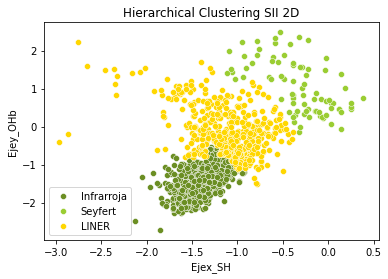

In [22]:
infrarroja_df = FusionData[FusionData['HC_S_2D'] == 'Infrarroja']
seyfert_df = FusionData[FusionData['HC_S_2D'] == 'Seyfert']
liner_df = FusionData[FusionData['HC_S_2D'] == 'LINER']

sns.scatterplot(data=infrarroja_df, x='Ejex_SH', y='Ejey_OHb', color='olivedrab', label='Infrarroja', marker='o')
sns.scatterplot(data=seyfert_df, x='Ejex_SH', y='Ejey_OHb', color='yellowgreen', label='Seyfert', marker='o')
sns.scatterplot(data=liner_df, x='Ejex_SH', y='Ejey_OHb', color='gold', label='LINER', marker='o')

plt.xlabel('Ejex_SH')
plt.ylabel('Ejey_OHb')
plt.title('Hierarchical Clustering SII 2D')
plt.legend()
plt.show()

# Conclusiones:    

## 2. Por medicion del Metodo: Coeficiente de Silueta: 40%

## 3. Por Frecuencia cruzada

Se tiene una exactitud del modelo de: 56%